In [222]:
import pandas as pd
import matplotlib as mpl
from collections import Counter
import matplotlib.pyplot  as plt
import numpy as np


In [223]:
local_file="movie_title_ratings.csv"
source=local_file
df = pd.read_csv(source)
df.head()

/Users/amjad/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,58
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.2,236
2,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.1,31
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.4,413
4,tt0000584,movie,El ciego de la aldea,El ciego de la aldea,0,1907,\N,75,Drama,4.8,35


In [224]:
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear          object
endYear            object
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
dtype: object

In [225]:
df2= df.loc[:,('tconst','startYear','genres','averageRating', 'numVotes')]

In [226]:
df2.head()

,tconst,startYear,genres,averageRating,numVotes
0,tt0000009,1894,Romance,5.4,58
1,tt0000147,1897,"Documentary,News,Sport",5.2,236
2,tt0000335,1900,"Biography,Drama",6.1,31
3,tt0000574,1906,"Biography,Crime,Drama",6.4,413
4,tt0000584,1907,Drama,4.8,35


In [227]:
# covert genre to list
df2.genres=df2.genres.apply(lambda x : x.split(','))

In [228]:
df2.dtypes

tconst            object
startYear         object
genres            object
averageRating    float64
numVotes           int64
dtype: object

In [229]:
# Extract a list of unique values from the genres column
genres_iter = (set(g) for g in df2.genres)
genres = sorted(set.union(*genres_iter))
# genres

In [230]:
#convert genres to dummy variables
df2=df2[['tconst','averageRating','numVotes','startYear']].join(df2.genres.str.join('|').str.get_dummies())
df2.head()

,tconst,averageRating,numVotes,startYear,Action,Adult,Adventure,Animation,Biography,Comedy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0000009,5.4,58,1894,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,tt0000147,5.2,236,1897,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,tt0000335,6.1,31,1900,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000574,6.4,413,1906,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000584,4.8,35,1907,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
#convert your StartYear column into the correct format
df2['startYear']=pd.to_datetime(df2[df2['startYear']!='\\N']['startYear'], format='%Y')

In [232]:
genres = ['Action','Adult', 'Adventure', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Horror','Romance','Thriller']
ratings_by_genre={}
for g in genres:
    ratings_by_genre[g]= df2.loc[df2[g]==1].groupby('startYear').averageRating.median()


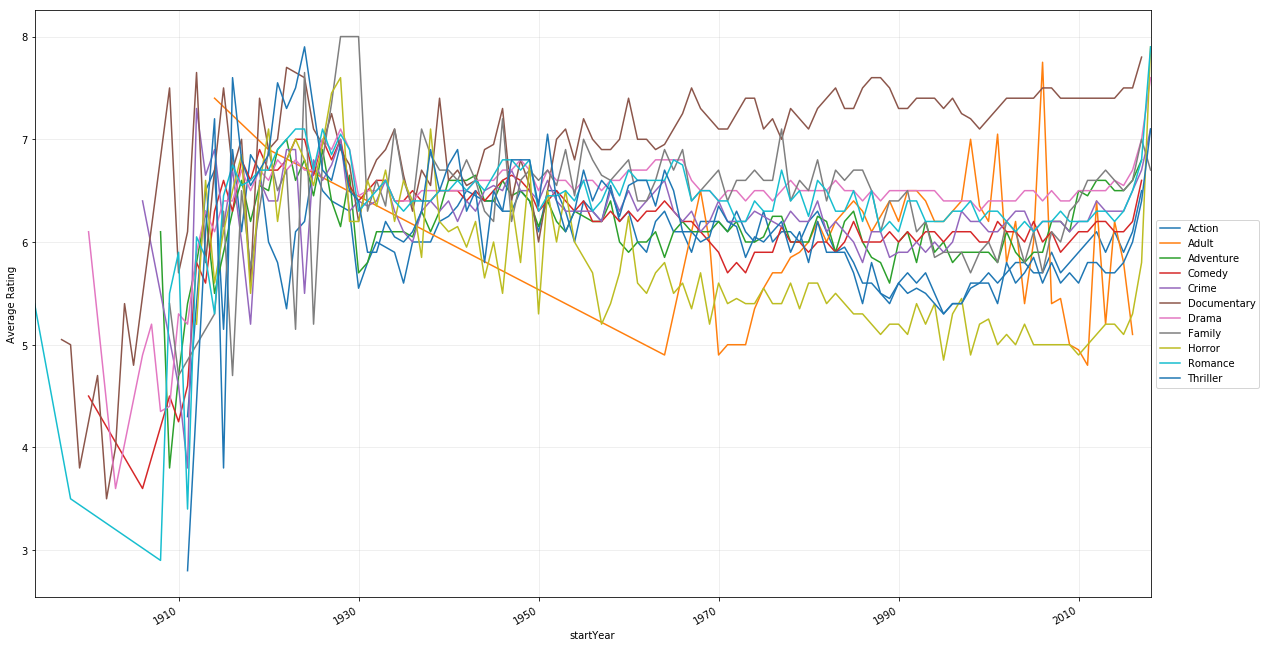

In [243]:
plt.figure(figsize = (20, 12))
for g in genres:
    ratings_by_genre[g].plot()

plt.ylabel('Average Rating')
plt.grid(True,alpha=0.25)
plt.legend(genres,loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show();


In [234]:
# compute AVG Rating for each genre
genreAvgRating={}
for genre in genres:
    genreAvgRating[genre]=df2.loc[df2[genre]==1].averageRating.mean()

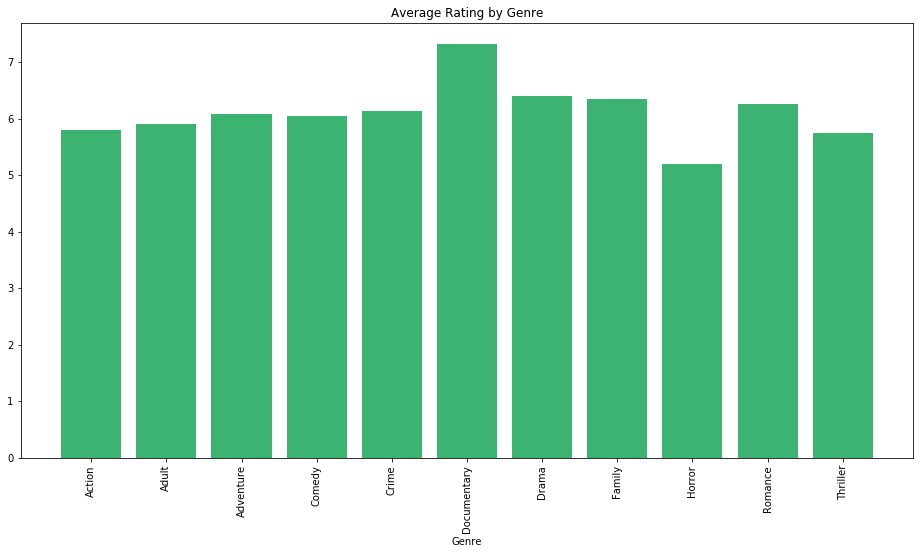

In [235]:
plt.figure(figsize = (16, 8))
plt.bar(range(len(genreAvgRating)), genreAvgRating.values(), align='center',color='mediumseagreen')
plt.xticks(range(len(genreAvgRating)), genreAvgRating.keys(),rotation='vertical')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.show()

In [236]:
# compute median(Rating) for each genre
genreQ2Rating={}
for genre in genres:
    genreQ2Rating[genre]=df2.loc[df2[genre]==1].averageRating.median()

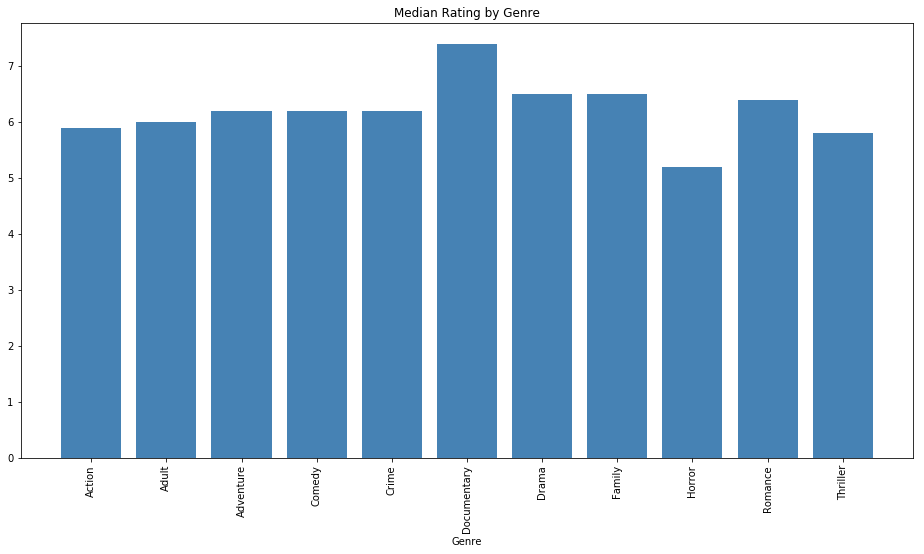

In [237]:
plt.figure(figsize = (16, 8))
plt.bar(range(len(genreQ2Rating)), genreQ2Rating.values(), align='center', color='steelblue')
plt.xticks(range(len(genreQ2Rating)), genreQ2Rating.keys(),rotation='vertical')
plt.title('Median Rating by Genre')
plt.xlabel('Genre')
plt.show()